# What is t-SNE?

It is a popular method of exploring high-dimensional data and has become widespread in the world of machine learning. It was introduced by Maaten and Hinton in 2008. It is a very useful dimensionality reduction technique and fairly better than the other techniques mentioned above. It has a very amazing ability to create two-dimensional maps from high dimension data. It’s very easy to implement in python using sci-kit learn.

source: https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0 etc.

# Dimensionality Reduction

If you have worked with a dataset before with a lot of features, you can fathom how difficult it is to understand or explore the relationships between the features. Not only it makes the EDA process difficult but also affects the machine learning model’s performance since the chances are that you might overfit your model or violate some of the assumptions of the algorithm, like the independence of features in linear regression. This is where dimensionality reduction comes in. In machine learning, dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. By reducing the dimension of your feature space, you have fewer relationships between features to consider which can be explored and visualized easily and also you are less likely to overfit your model.

Dimensionality reduction can be achieved in the following ways:

* Feature Elimination: You reduce the feature space by eliminating features. This has a disadvantage though, as you gain no information from those features that you have dropped.

* Feature Selection: You apply some statistical tests in order to rank them according to their importance and then select a subset of features for your work. This again suffers from information loss and is less stable as different test gives different importance score to features.

* Feature Extraction: You create new independent features, where each new independent feature is a combination of each of the old independent features. These techniques can further be divided into linear and non-linear dimensionality reduction techniques.

## Principal Component Analysis (PCA)

Principal Component Analysis or PCA is a linear feature extraction technique. It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. It does so by calculating the eigenvectors from the covariance matrix. The eigenvectors that correspond to the largest eigenvalues (the principal components) are used to reconstruct a significant fraction of the variance of the original data.

In simpler terms, PCA combines your input features in a specific way that you can drop the least important feature while still retaining the most valuable parts of all of the features. As an added benefit, each of the new features or components created after PCA are all independent of one another.

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It is extensively applied in image processing, NLP, genomic data and speech processing. To keep things simple, here’s a brief overview of working of t-SNE:

The algorithms starts by calculating the probability of similarity of points in high-dimensional space and calculating the probability of similarity of points in the corresponding low-dimensional space. The similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian (normal distribution) centered at A.

It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in lower-dimensional space.

To measure the minimization of the sum of difference of conditional probability t-SNE minimizes the sum of Kullback-Leibler divergence of overall data points using a gradient descent method.

Note Kullback-Leibler divergence or KL divergence is is a measure of how one probability distribution diverges from a second, expected probability distribution.

Those who are interested in knowing the detailed working of an algorithm can refer to this research paper.

In simpler terms, t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

In this way, t-SNE maps the multi-dimensional data to a lower dimensional space and attempts to find patterns in the data by identifying observed clusters based on similarity of data points with multiple features. However, after this process, the input features are no longer identifiable, and you cannot make any inference based only on the output of t-SNE. Hence it is mainly a data exploration and visualization technique.

While t-SNE is a dimensionality reduction technique, it is mostly used for visualization and not data pre-processing (like you might with PCA). For this reason, you almost always reduce the dimensionality down to 2 with t-SNE, so that you can then plot the data in two dimensions.

The reason t-SNE is common for visualization is that the goal of the algorithm is to take your high dimensional data and represent it correctly in lower dimensions — thus points that are close in high dimensions should remain close in low dimensions. It does this in a non-linear and local way, so different regions of data could be transformed differently.
t-SNE has a hyper-parameter called perplexity. Perplexity balances the attention t-SNE gives to local and global aspects of the data and can have large effects on the resulting plot. A few notes on this parameter:
* It is roughly a guess of the number of close neighbors each point has. Thus, a denser dataset usually requires a higher perplexity value.
* It is recommended to be between 5 and 50.
* It should be smaller than the number of data points.

The biggest mistake people make with t-SNE is only using one value for perplexity and not testing how the results change with other values. If choosing different values between 5 and 50 significantly change your interpretation of the data, then you should consider other ways to visualize or validate your hypothesis.

It is also overlooked that since t-SNE uses gradient descent, you also have to tune appropriate values for your learning rate and the number of steps for the optimizer. The key is to make sure the algorithm runs long enough to stabilize.

You need to be aware of the following points:
* tSNE can practically only embed into 2 or 3 dimensions, i.e. only for visualization purposes, so it is hard to use tSNE as a general dimension reduction technique in order to produce e.g. 10 or 50 components.
* You cannot see the relative sizes of clusters in a t-SNE plot. This point is crucial to understand as t-SNE naturally expands dense clusters and shrinks spares ones. I often see people draw inferences by comparing the relative sizes of clusters in the visualization. Don’t make this mistake.
* Distances between well-separated clusters in a t-SNE plot may mean nothing. Another common fallacy. So don’t necessarily be dismayed if your “beach” cluster is closer to your “city” cluster than your “lake” cluster.
    * tSNE does not preserve global data structure, meaning that only within cluster distances are meaningful while between cluster similarities are not guaranteed, therefore it is widely acknowledged that clustering on tSNE is not a very good idea.
* Clumps of points — especially with small perplexity values — might just be noise. It is important to be careful when using small perplexity values for this reason. And to remember to always test many perplexity values for robustness.
* tSNE performs a non-parametric mapping from high to low dimensions, meaning that it does not leverage features (aka PCA loadings) that drive the observed clustering.
* tSNE can not work with high-dimensional data directly, Autoencoder or PCA are often used for performing a pre-dimensionality reduction before plugging it into the tSNE
* tSNE consumes too much memory for its computations which becomes especially obvious when using large perplexity hyperparameter since the k-nearest neighbor initial step (like in Barnes-Hut procedure) becomes less efficient and important for time reduction.

### Using t-SNE in Python

Now you will apply t-SNE on an open source dataset and try to visualize the results. In addition, you will also visualize the output of PCA on the same dataset to compare it with that of t-SNE.

I first reduce the dimensionality to 50 using PCA before running t-SNE. I have found that to be good practice (when having over 50 features) because otherwise, t-SNE will take forever to run.

In [26]:
%matplotlib notebook

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

In [32]:
def do_plot(X_fit, title, labels):
    print(f"shape: {X_fit.shape}\n{X_fit[:3,]}")
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=col)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()

Generate the data
To create a simple test case, we generate some Gaussian point clouds in $\mathbb{R}^3$. Then we see how they look embedded in $\mathbb{R}^2$ and $\mathbb{R}^3$ using various algorithms, including t-SNE.

There's one point cloud centered at the origin and three on each of the three axes. They are well separated, as can be seen in the first visualization below.

In [33]:
num_dimensions = 3
num_clusters = 4
num_points = 100
cluster_separation = 6
centers = np.array([(0,0,0), (1,0,0), (0,1,0), (0,0,1)], dtype=float) * cluster_separation
data = np.zeros((num_clusters * num_points, num_dimensions), dtype=float)
labels = np.zeros(num_clusters * num_points, dtype=int)
for c in range(num_clusters):
    start = c * num_points
    end = start + num_points
    data[start:end, :] = np.random.randn(num_points, num_dimensions) + centers[c]
    labels[start:end] = c
data_df = pd.DataFrame(data, columns=('x','y','z'))
data_df['label'] = labels
data_df.head()

,x,y,z,label
0,0.865137,-0.015596,1.072210,0
1,-0.379840,1.170621,1.747174,0
2,-0.061528,-0.725484,0.322296,0
3,0.155851,0.582944,1.030360,0
4,0.491762,-0.846048,1.428833,0


In [34]:
X = data_df.iloc[:,0:-1]
X_std = StandardScaler().fit_transform(X)
y = data_df['label'].values

In [35]:
X.head()

,x,y,z
0,0.865137,-0.015596,1.072210
1,-0.379840,1.170621,1.747174
2,-0.061528,-0.725484,0.322296
3,0.155851,0.582944,1.030360
4,0.491762,-0.846048,1.428833


shape: (400, 3)
[[ 0.8651 -0.0156  1.0722]
 [-0.3798  1.1706  1.7472]
 [-0.0615 -0.7255  0.3223]]


<IPython.core.display.Javascript object>


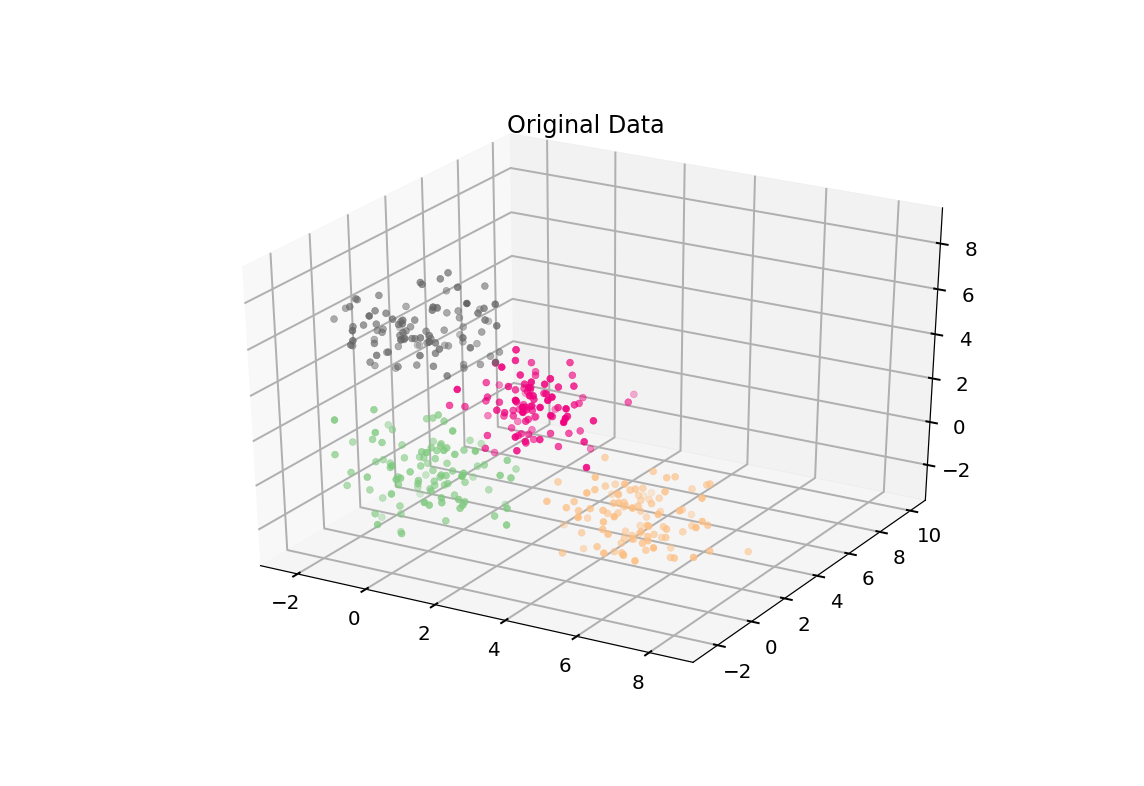

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [36]:
do_plot(X.values, 'Original Data', y)

In [37]:
X.values[:,0:-1].shape

(400, 2)

shape: (400, 2)
[[-0.0156  1.0722]
 [ 1.1706  1.7472]
 [-0.7255  0.3223]]


<IPython.core.display.Javascript object>


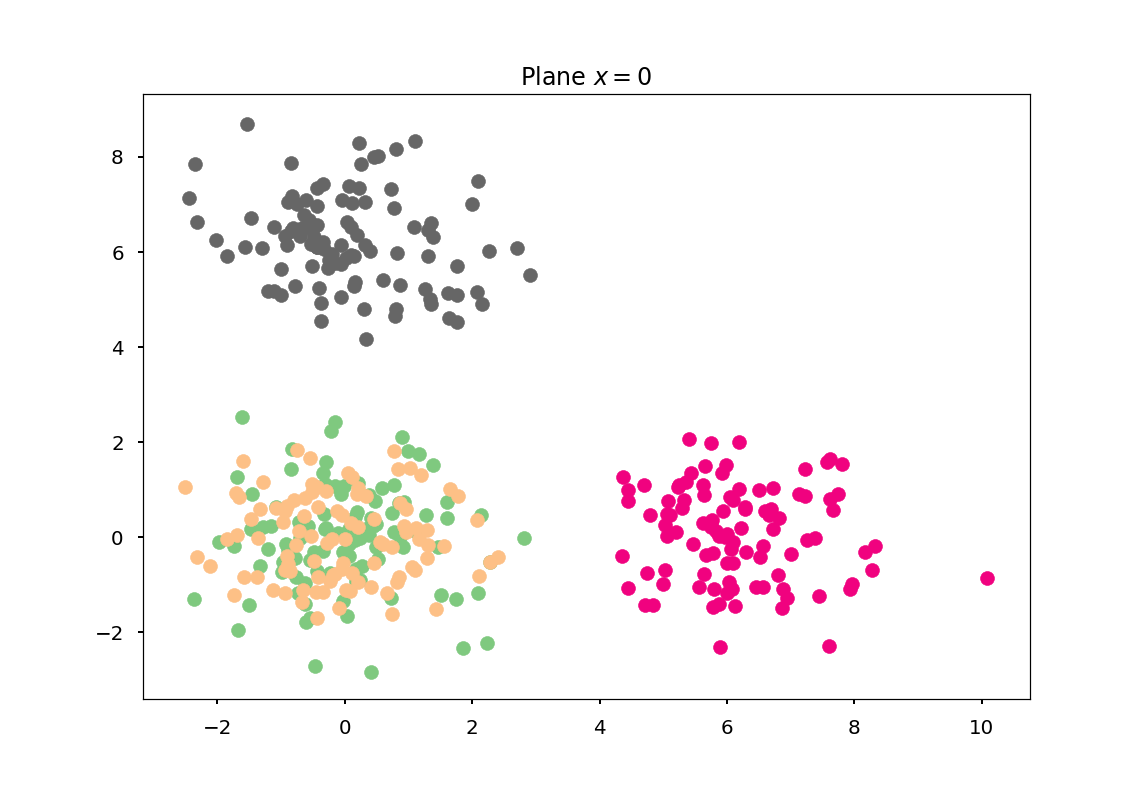

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [38]:
# Dumb 2D projection: The easiest way to embed our data into two dimensions is to project onto the plane $x=0$.
do_plot(X.values[:,1:], 'Plane $x=0$', y)

shape: (400, 2)
[[-0.8429  0.0462]
 [ 0.2281 -1.4327]
 [-0.7767 -0.0359]]


<IPython.core.display.Javascript object>


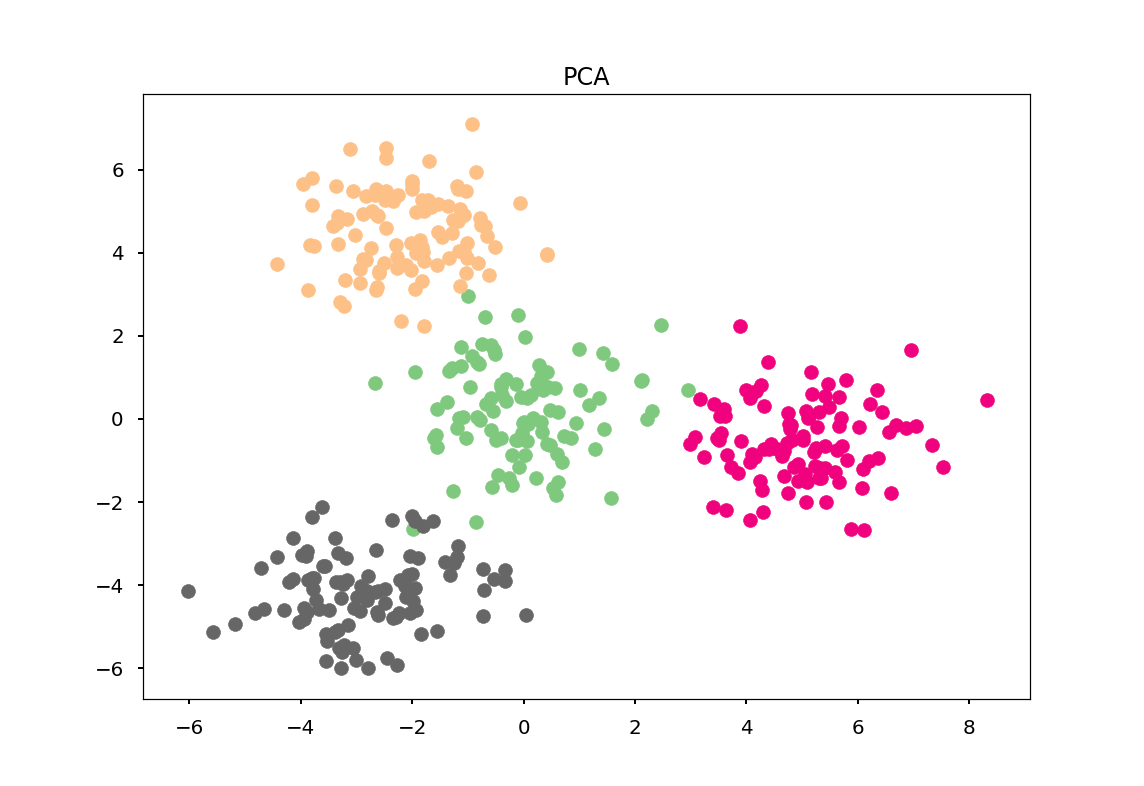

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [39]:
# PCA (2D)
do_plot(PCA(n_components=2).fit_transform(X), 'PCA', y)

shape: (400, 2)
[[ 3.4103 -0.017 ]
 [ 5.3419  0.0348]
 [ 3.8455 -0.0234]]


<IPython.core.display.Javascript object>


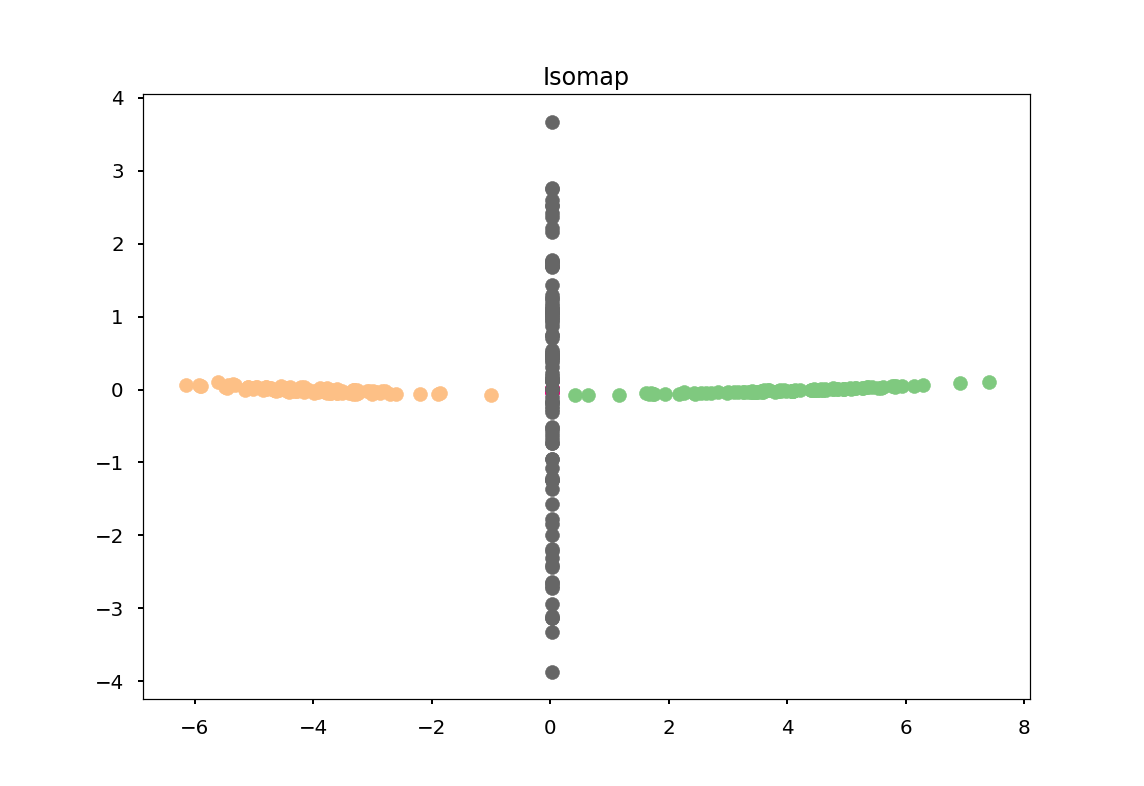

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [41]:
# Isomap
do_plot(Isomap(n_components=2).fit_transform(X), 'Isomap', y)

shape: (400, 2)
[[-0.  0.]
 [-0.  0.]
 [-0.  0.]]


<IPython.core.display.Javascript object>


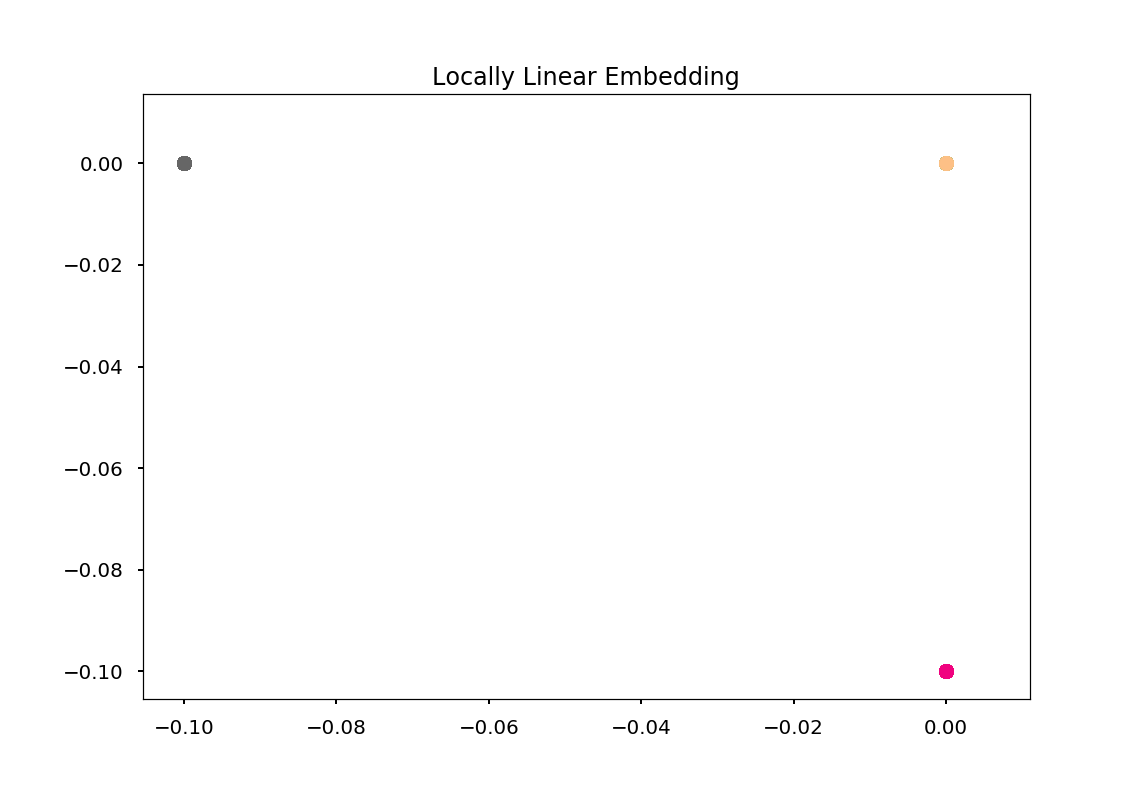

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [43]:
# LocallyLinearEmbedding
do_plot(LocallyLinearEmbedding(n_components=2).fit_transform(X), 'Locally Linear Embedding', y)

shape: (400, 2)
[[-0.0025 -0.0001]
 [-0.0023  0.0001]
 [-0.0024 -0.0001]]


<IPython.core.display.Javascript object>


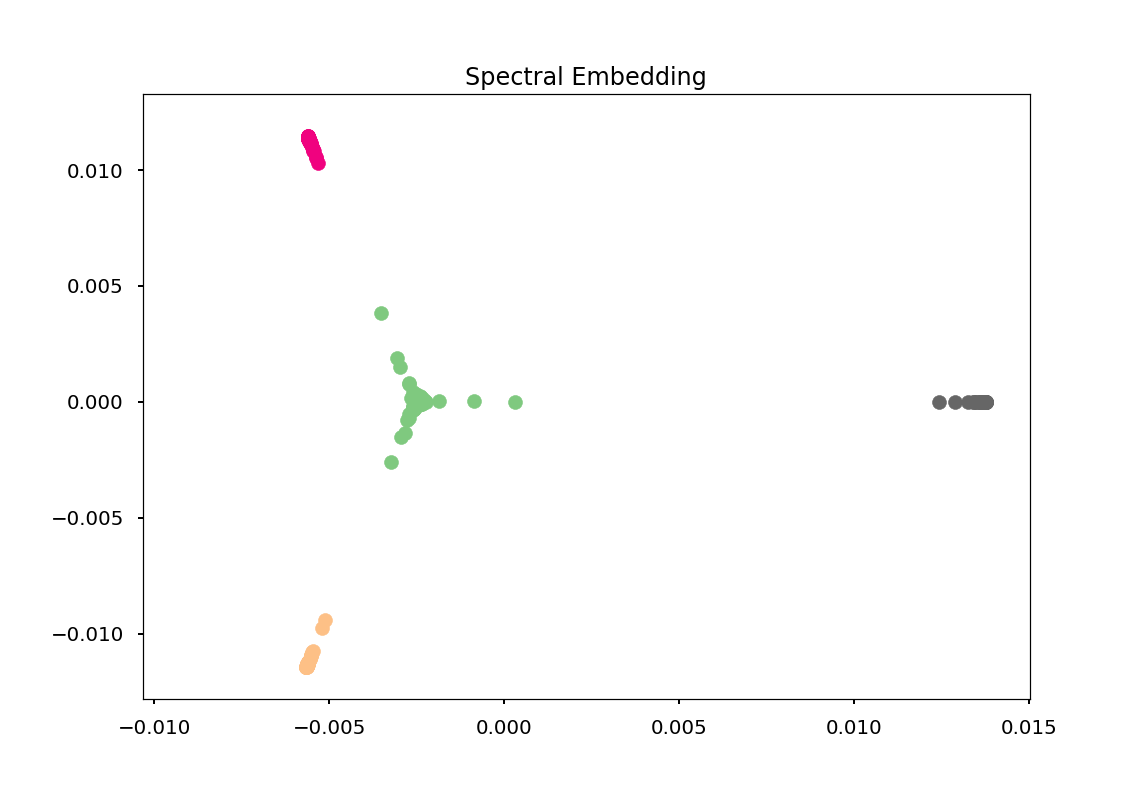

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [45]:
# SpectralEmbedding
do_plot(SpectralEmbedding(n_components=2).fit_transform(X), 'Spectral Embedding', y)

shape: (400, 2)
[[ 0.5149 -0.7478]
 [-1.4243 -0.5497]
 [ 0.4558 -0.7259]]


<IPython.core.display.Javascript object>


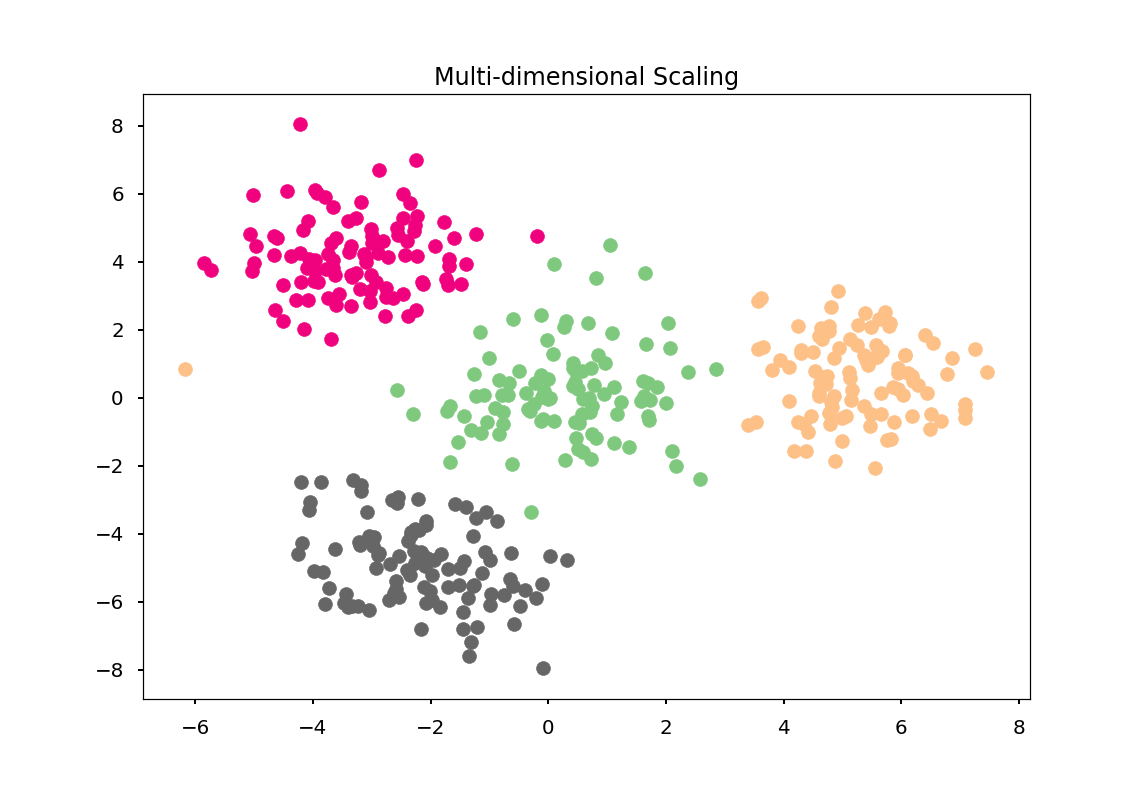

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [47]:
# Multi-dimensional scaling (MDS)
do_plot(MDS(n_components=2).fit_transform(X), 'Multi-dimensional Scaling', y)

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

shape: (400, 2)
[[ 9.8681 26.3968]
 [12.3934 28.7711]
 [ 7.5218 25.7029]]


<IPython.core.display.Javascript object>


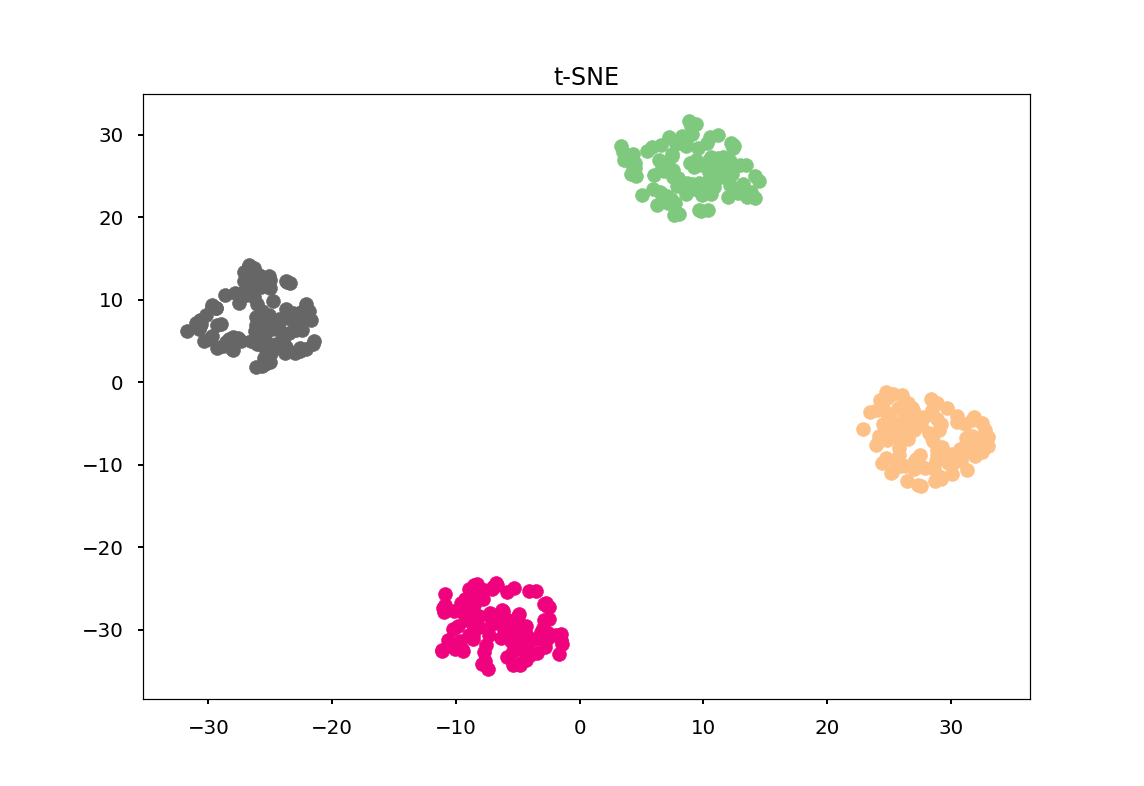

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [49]:
# t-SNE (2D)
tsne2 = TSNE(n_components=2, random_state=0)
do_plot(tsne2.fit_transform(X), 't-SNE', y)

shape: (400, 3)
[[-0.8429  0.0462  1.5313]
 [ 0.2281 -1.4327  1.2516]
 [-0.7767 -0.0359  2.9147]]


<IPython.core.display.Javascript object>


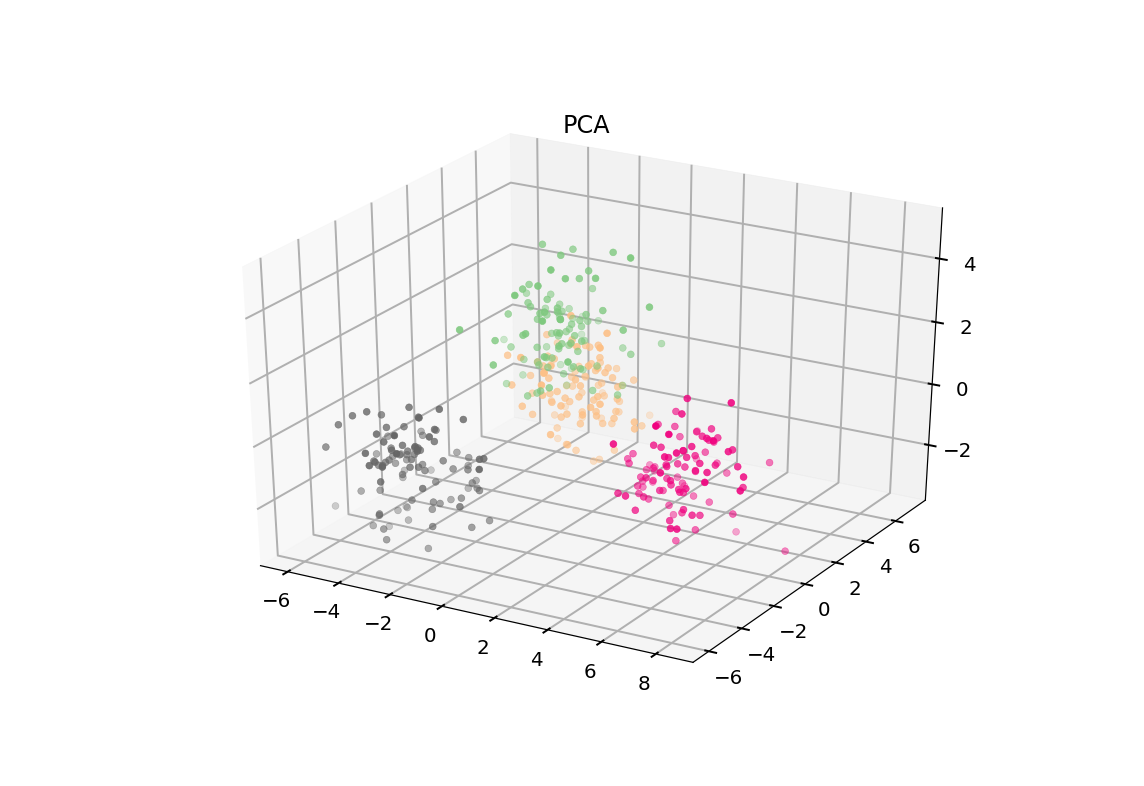

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [51]:
do_plot(PCA(n_components=3).fit_transform(X), 'PCA', y)

shape: (400, 3)
[[ 1.5614  8.6872  1.9227]
 [-0.7095  9.937   2.8788]
 [ 1.8725 10.6569  0.167 ]]


<IPython.core.display.Javascript object>


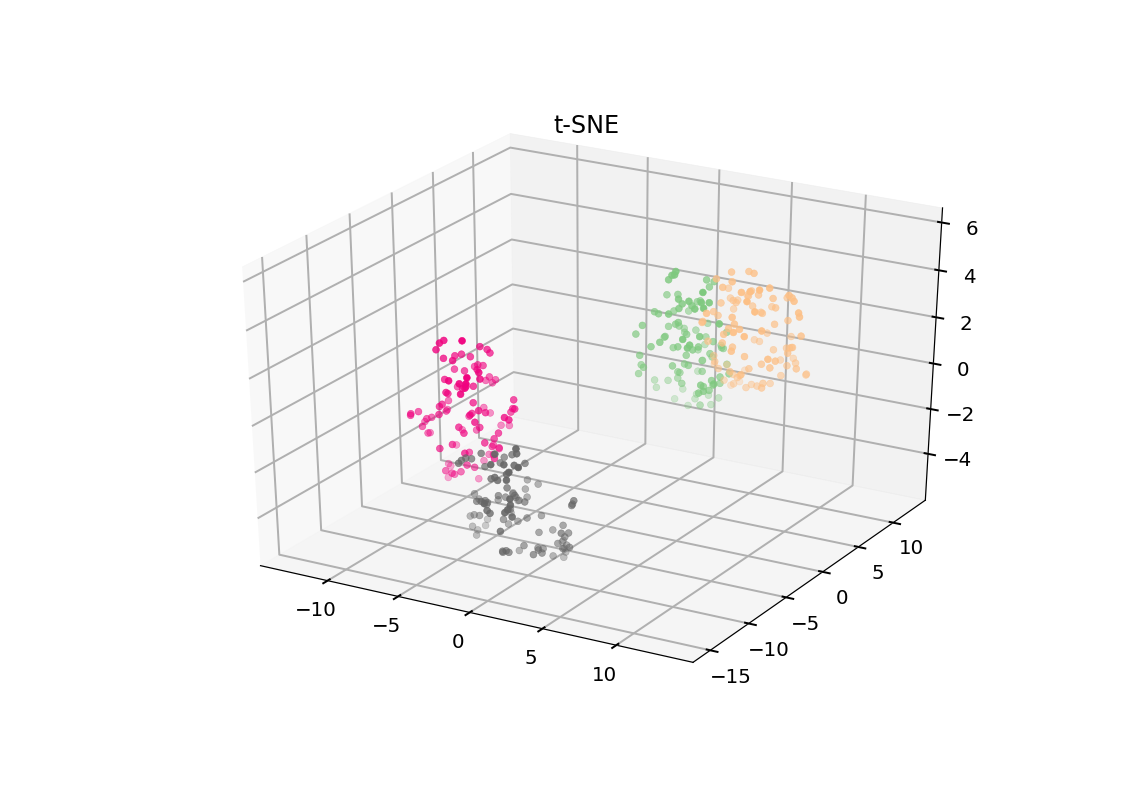

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [53]:
# t-SNE (3D)
tsne3 = TSNE(n_components=3, learning_rate=100, random_state=0)
do_plot(tsne3.fit_transform(X), 't-SNE', y)

## HDBScan

HDBScan is a fairly recent and well-regarded clustering algorithm. The reason it's here is to see how well it does on some fairly simple data and visualize its results via t-SNE.

Number of clusters: 4
shape: (400, 2)
[[ 9.8681 26.3968]
 [12.3934 28.7711]
 [ 7.5218 25.7029]]


<IPython.core.display.Javascript object>


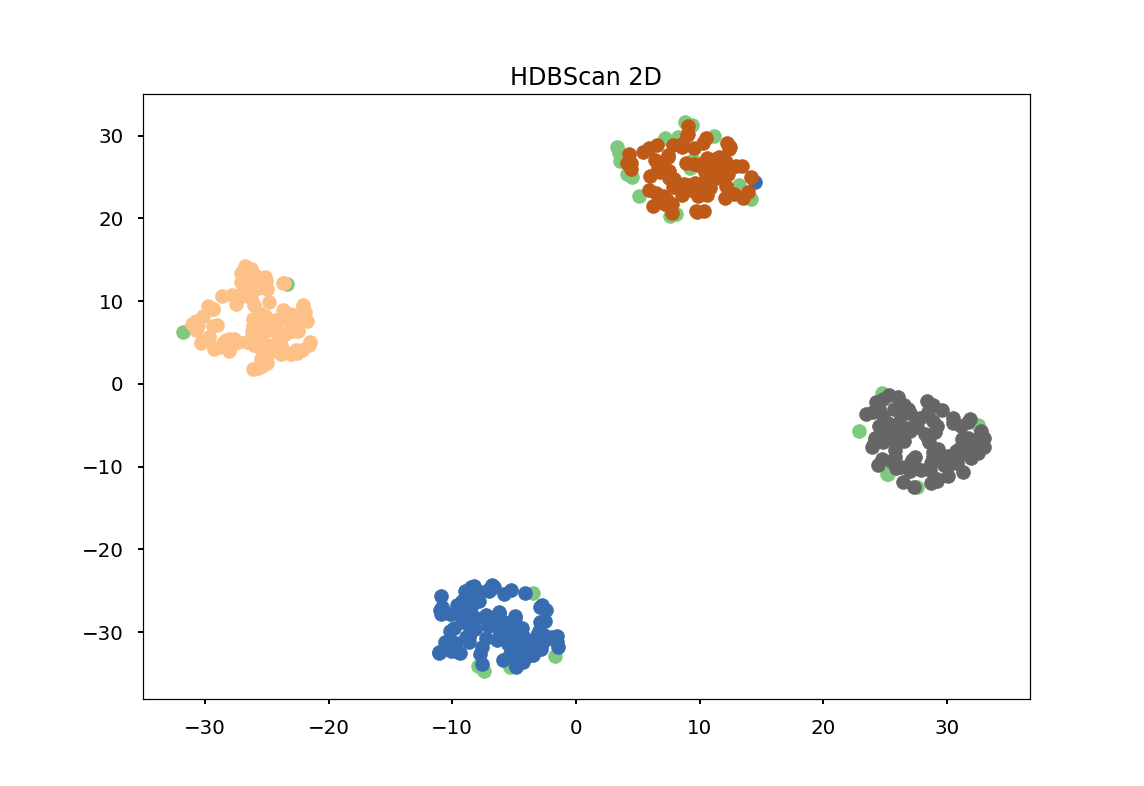

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

shape: (400, 3)
[[ 1.5614  8.6872  1.9227]
 [-0.7095  9.937   2.8788]
 [ 1.8725 10.6569  0.167 ]]


<IPython.core.display.Javascript object>


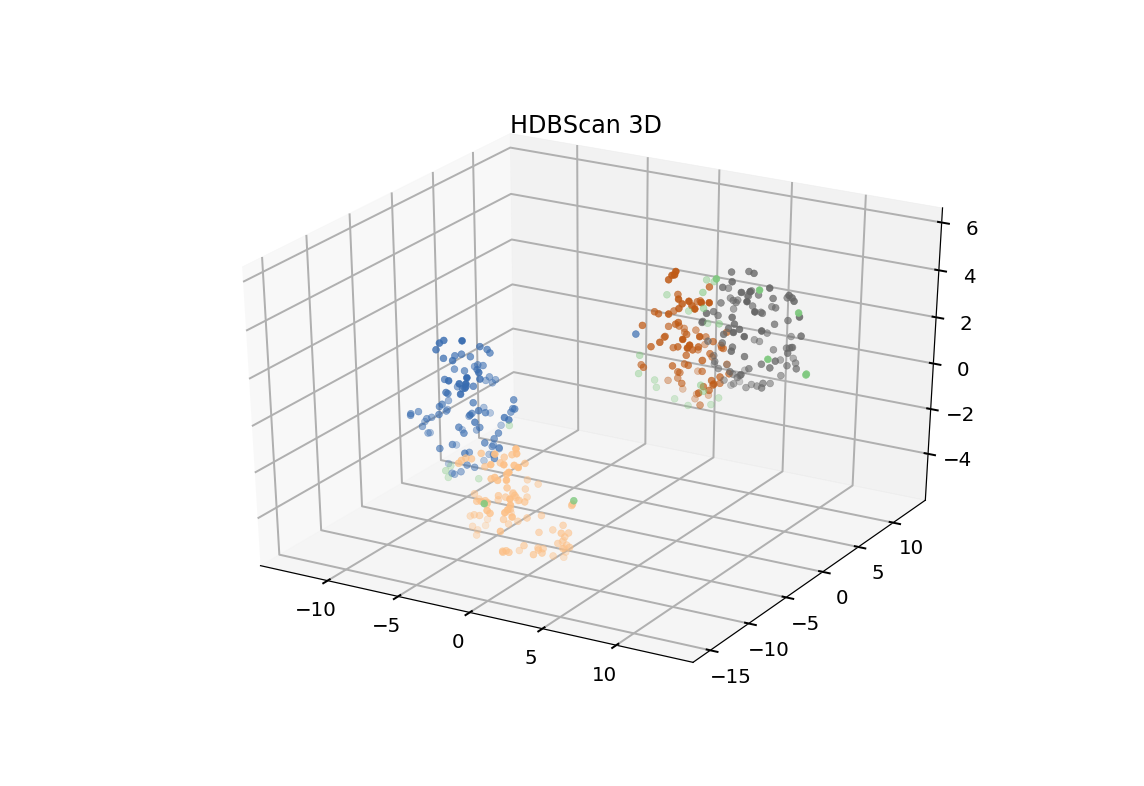

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [55]:
if hdbscan_available:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=20)
    cluster_labels = clusterer.fit_predict(X_std) + 1
    print('Number of clusters: {}'.format(max(cluster_labels)))
    do_plot(tsne2.fit_transform(X), 'HDBScan 2D', labels=cluster_labels)
    do_plot(tsne3.fit_transform(X), 'HDBScan 3D', labels=cluster_labels)
